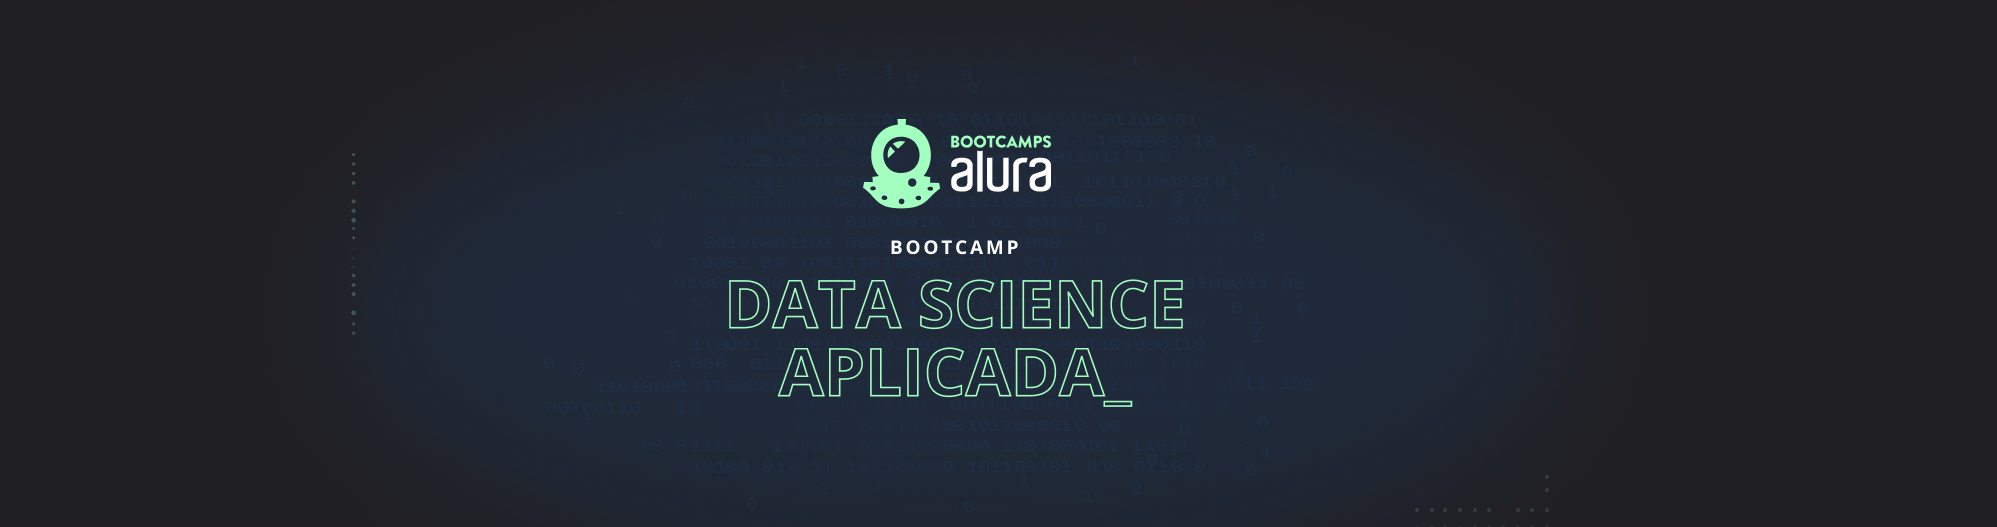

# Bootcamp de Data Science - **Super desafio Módulo 01**
###### **Nicolas Stelatto** | [Linkedin](https://www.linkedin.com/in/nicolas-stelatto/)
###### **Projeto** | Análise de óbitos por Unidade da Federação

## 1 - Motivo da escolha da base de dados

## 2 - Hipóteses e dúvidas que gostaria de responder

- Qual a tendência do número de óbitos?
- Quais os picos de número de óbitos? Isso está relacionado com algum incidente?
- Quais são os cinco estados com maior número de óbitos em 2020 por 100.000 habitantes?
- O que pode estar gerando esses óbitos? gerar hipóteses
- Quais são as regiões com maior número de mortes por habitantes? Será que existe uma região pior que a outra?



## 3 - Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib
import matplotlib.pyplot as plt

In [2]:
url_dados = "https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/raw/main/Modulo_1/Desafio/Dados/obitos_por_ano_mes_por_UF.csv"

dados_obitos_uf = pd.read_csv(url_dados, sep=";", encoding="ISO-8859-1", engine="python", skiprows=3, skipfooter=11, thousands=".", decimal=",")
dados_obitos_uf

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,112,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,37058
1,12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,-,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18615
2,13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,315,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,64963
3,14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,48,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12466
4,15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,801,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591
5,16 Amapá,65,81,42,51,34,42,52,52,59,83,58,84,68,68,48,91,64,77,69,75,82,71,66,76,90,80,68,80,43,84,78,50,73,54,76,70,81,79,52,...,54,83,80,96,105,96,84,86,77,89,91,82,116,72,110,116,108,90,85,87,75,96,96,76,97,70,59,84,187,179,216,149,80,76,63,146,110,136,205,13005
6,17 Tocantins,141,210,253,199,173,216,229,202,189,164,195,196,165,247,168,171,206,202,218,218,210,242,200,161,229,223,256,205,211,202,233,222,187,241,226,209,216,233,206,...,218,173,228,168,167,155,195,213,170,178,168,130,246,264,249,220,208,211,210,220,278,224,220,217,283,252,290,231,248,283,363,333,341,299,9,14,15,4,52,33714
7,21 Maranhão,202,320,308,335,374,307,363,409,354,319,216,330,297,362,350,359,407,358,332,438,434,364,373,445,407,398,486,443,444,457,483,437,422,429,472,381,465,447,574,...,947,861,874,979,980,950,885,880,798,777,813,857,1022,836,1025,903,994,1007,911,962,873,917,837,827,940,909,970,900,1826,1932,1491,1138,1051,1110,1063,858,1057,1148,1800,113499
8,22 Piauí,224,337,337,277,368,358,368,294,358,363,355,276,332,334,312,407,350,484,337,370,266,341,323,380,419,386,390,414,379,347,291,300,304,295,379,350,358,343,432,...,530,507,553,562,578,518,584,463,495,495,513,464,509,522,510,617,598,587,574,567,564,531,496,537,558,503,469,434,477,566,839,918,654,713,559,578,675,665,697,75742
9,23 Ceará,548,1021,1142,1231,1144,1191,1254,1031,1077,1170,858,1057,1052,1204,1370,1200,1410,1167,1349,1200,1264,1178,1213,1105,1159,1257,1224,1278,1269,1172,1183,1229,1157,1155,1160,1165,1147,1223,1346,...,1414,1537,1682,1709,1681,1648,1541,1661,1578,1588,1555,1484,1673,1495,1620,1754,1803,1720,1719,1734,1617,1670,1607,1692,1740,1572,1621,1603,2449,2678,2217,

In [3]:
dados_obitos_uf.set_index("Unidade da Federação", inplace=True)

In [4]:
colunas_usaveis = dados_obitos_uf.mean().index.to_list()

In [5]:
dados_obitos_uf_usaveis = dados_obitos_uf[colunas_usaveis]
dados_obitos_uf_usaveis.head()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,57,99,45,43,54,47,109,114,105,124,90,82,100,93,110,124,98,123,123,115,127,148,102,143,102,114,132,180,167,201,197,271,173,159,168,172,142,165,194,183,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,37058
12 Acre,30,94,76,103,94,71,114,116,104,77,53,66,136,97,93,107,107,79,100,84,129,101,111,107,70,115,141,112,106,85,114,130,137,107,125,149,125,101,145,141,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18615
13 Amazonas,149,243,312,320,240,270,288,284,254,228,157,203,231,155,179,274,267,298,290,318,260,267,259,276,208,237,251,258,343,254,280,275,260,283,250,310,342,332,357,335,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,64963
14 Roraima,23,21,23,38,26,24,38,29,34,62,29,36,49,37,28,41,39,58,36,63,61,52,49,58,52,57,54,66,62,66,57,77,81,72,52,48,31,48,47,34,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12466
15 Pará,543,581,655,524,622,629,742,658,767,683,542,575,677,657,697,701,744,675,781,733,739,695,641,809,723,721,721,678,744,791,816,780,771,780,705,832,783,818,727,698,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591


In [6]:
pd.options.display.float_format = "{:.2f}".format

## 4 - Análise preliminar dos dados

### 4.1 - Número de óbitos por estado no Brasil

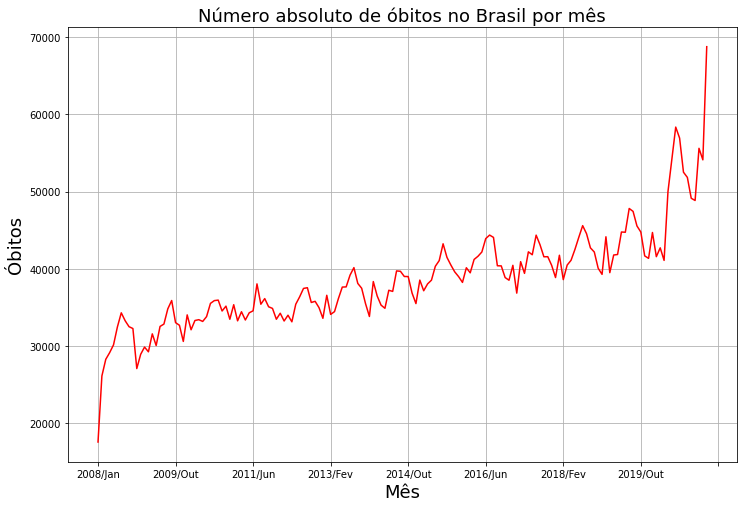

In [7]:
dados_obitos_uf_usaveis.loc["Total"].drop("Total").plot(figsize=(12,8))
plt.title("Número absoluto de óbitos no Brasil por mês", fontsize=18)
plt.xlabel("Mês", fontsize=18)
plt.ylabel("Óbitos", fontsize=18)
plt.gca().get_lines()[0].set_color("red")
plt.grid()
plt.show()

### 4.2 - Cinco estados com maior número de óbitos desde 2008

In [8]:
dados_obitos_uf_usaveis_ascending = dados_obitos_uf_usaveis.drop("Total", axis=0).sort_values(by="Total", ascending=False).drop("Total", axis=1)

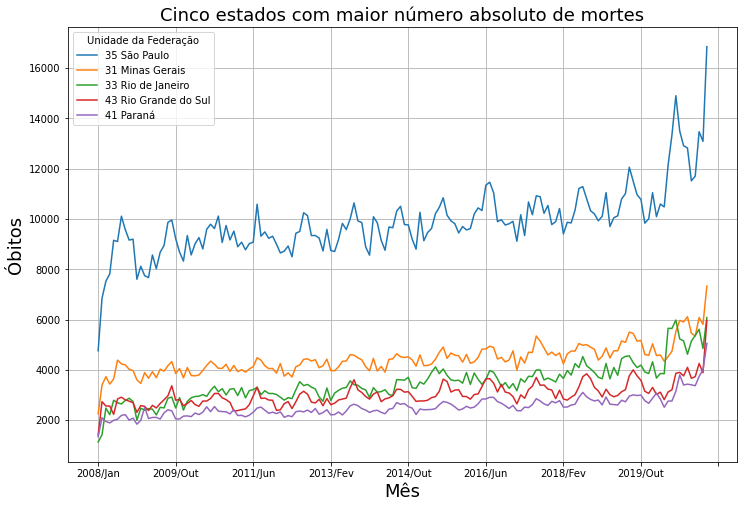

In [9]:
dados_obitos_uf_usaveis_ascending[:5].T.plot(figsize=(12,8))
plt.title("Cinco estados com maior número absoluto de mortes", fontsize=18)
plt.xlabel("Mês", fontsize=18)
plt.ylabel("Óbitos", fontsize=18)
plt.grid()
plt.show()

## 5 - Pergunta 01. Qual a tendência do número de óbitos?


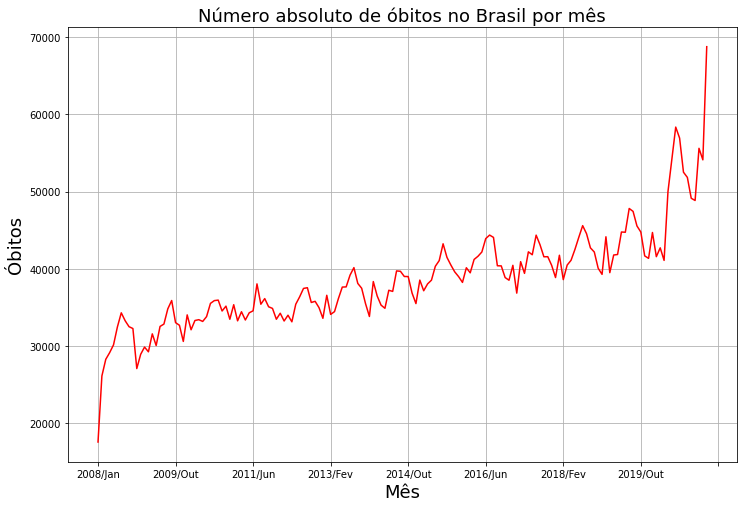

In [10]:
dados_obitos_uf_usaveis.loc["Total"].drop("Total").plot(figsize=(12,8))
plt.title("Número absoluto de óbitos no Brasil por mês", fontsize=18)
plt.xlabel("Mês", fontsize=18)
plt.ylabel("Óbitos", fontsize=18)
plt.gca().get_lines()[0].set_color("red")
plt.grid()
plt.show()

Observado o gráfico, podemos notar:
- O gráfico apresenta uma certa sazonalidade
- O grande pico localizado em 2020 tem sua origem na pandemia do coronavírus
- Mesmo desconsiderando o pico de 2020, existe uma tendência de alta. Como estamos trabalhando com valores absolutos, uma hipótese para a tendência de alta é que a população está aumentando também (vamos trabalhar isso futuramente na análise)
- O gráfico apresenta alguns valores discrepantes no início. Isso pode ser explicado por conta de uma discrepância no cadastro dos dados. Para eliminar esse problema e ajustar a base para os próximos desafios, vamos remover todos os dados de 2008, 2009 e o primeiro semestre de 2010

In [11]:
colunas_obitos_usaveis = dados_obitos_uf_usaveis.columns.to_list()[29:]
dados_obitos_uf_usaveis = dados_obitos_uf_usaveis[colunas_obitos_usaveis]
dados_obitos_uf_usaveis.head()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,201,197,271,173,159,168,172,142,165,194,183,185,168,250,269,155,150,156,135,216,213,181,222,244,228,191,183,175,171,160,203,211,243,261,271,236,201,230,236,228,...,299,301,289,286,283,281,365,270,252,268,273,283,298,270,265,329,322,255,329,280,312,324,312,227,300,246,257,269,295,357,446,476,408,293,266,360,435,333,559,37058
12 Acre,85,114,130,137,107,125,149,125,101,145,141,113,156,127,144,110,116,116,107,45,117,134,107,111,116,112,68,117,125,89,98,147,109,134,100,80,127,101,106,99,...,128,85,91,97,95,149,128,117,140,144,185,111,135,107,138,120,146,146,110,144,138,127,105,127,157,152,180,138,158,191,192,163,136,173,119,147,143,188,205,18615
13 Amazonas,254,280,275,260,283,250,310,342,332,357,335,354,392,267,332,328,341,303,342,337,332,352,315,358,362,308,307,332,318,302,342,334,334,380,335,343,206,345,277,307,...,437,407,492,470,533,536,486,486,462,513,467,496,570,494,627,532,570,457,550,519,596,543,552,490,520,595,507,629,1484,1465,916,657,673,609,715,607,1330,1616,1796,64963
14 Roraima,66,57,77,81,72,52,48,31,48,47,34,48,53,50,44,48,59,64,62,75,72,76,83,73,59,62,57,50,39,51,58,44,71,48,46,64,54,74,57,38,...,111,107,78,93,103,132,123,104,126,111,110,102,114,122,52,115,109,124,171,119,139,110,131,122,105,106,107,98,177,328,177,85,107,114,135,127,190,322,287,12466
15 Pará,791,816,780,771,780,705,832,783,818,727,698,732,633,695,883,814,764,777,813,749,785,840,754,727,778,621,877,804,777,868,861,864,859,821,839,898,821,826,864,803,...,930,960,1011,996,1083,1010,919,1024,984,976,889,961,972,938,974,990,1016,1083,867,881,1007,925,920,1001,931,974,945,886,1354,2218,1524,1762,1196,1019,1075,1068,1163,1230,1277,139591


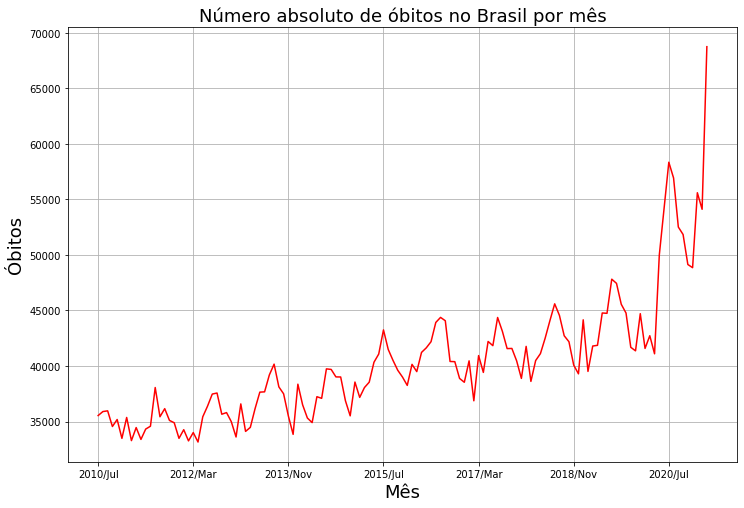

In [12]:
dados_obitos_uf_usaveis.loc["Total"].drop("Total").plot(figsize=(12,8))
plt.title("Número absoluto de óbitos no Brasil por mês", fontsize=18)
plt.xlabel("Mês", fontsize=18)
plt.ylabel("Óbitos", fontsize=18)
plt.gca().get_lines()[0].set_color("red")
plt.grid()
plt.show()

Agora podemos perceber mais claramente a tendência de crescimento do número de óbitos (precisamos verificar se existe uma tendência de crescimento considerando os óbitos relativos à população do Brasil)

## 6 - Pergunta 02. Quais os picos de números de óbitos? Isso está relacionado à algum incidente? Gere hipóteses para a sazonalidade observada

Os dois picos de óbitos estão relacionados à pandemia do coronavírus. Tanto no início do segundo semestre de 2020 e no início de 2021 tivemos um pico de mortes por coronavírus ou SRAG (Síndrome respiratória aguda grave)

Uma hipótese para a sazonalidade do número de óbitos no segundo semestre de cada ano é relacionado à variação dos tempos de inverno. Existem alguns trabalhos científicos que relacionam variações atmosféricas do tempo de inverno com óbitos por gripe ou doenças respiratórias para idosos

Seria necessário analisar outras informações para ter uma conclusão precisa sobre a sazonalidade do número de óbitos

## 7 - Pergunta 03. Quais são os cinco estados com maior número de óbitos por habitante nos picos detectados no total de óbitos

### 7.1 - Baixando dados de população/habitantes por UF

A população é um dado demográfico medido pelo IBGE em um censo que é realizado a cada 10 anos. Para nosso trabalho, nós vamos usar a informação de projeções da população realizada pelo IGBE e revisado em 2018.

Os dados foram retirados [desse link](https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?=&t=downloads)

In [14]:
url_habitantes = "https://github.com/nicolas-stelatto/bootcamp_data_science_aplicada/raw/main/Modulo_1/Desafio/Dados/Populacoes_Projetadas_Mensais_dia_01_ate_2030.csv"

habitantes_uf = pd.read_csv(url_habitantes, sep=";", encoding="ISO-8859-1", engine="python", skiprows=1, skipfooter=2, decimal=",", thousands=".")
habitantes_uf

,DATA,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,RondÃ´nia,Acre,Amazonas,Roraima,ParÃ¡,AmapÃ¡,Tocantins,MaranhÃ£o,PiauÃ­,CearÃ¡,Rio Grande do Norte,ParaÃ­ba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,EspÃ­rito Santo,Rio de Janeiro,SÃ£o Paulo,ParanÃ¡,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,GoiÃ¡s,Distrito Federal
0,"julho, 2010",194875052,16247841,54229734,82138970,27911930,14346577,1598381,765430,3551217,459844,7765472,693857,1413640,6715260,3193930,8625391,3240375,3840945,9001011,3196933,2108757,14307132,19957386,3595291,16298103,42288190,10650244,6351544,10910142,2493878,3104317,6109715,2638667
1,"agosto, 2010",195017573,16267657,54255905,82198254,27930974,14364783,1600017,766537,3556859,460248,7773575,695303,1415119,6718546,3194627,8629903,3242977,3842254,9006205,3198340,2110555,14312498,19968902,3599212,16306954,42323187,10657439,6358951,10914584,2496536,3107705,6118387,2642154
2,"setembro, 2010",195160170,16287491,54282102,82257547,27950035,14382995,1601654,767643,3562499,460676,7781672,696749,1416598,6721836,3195325,8634424,3245578,3843572,9011400,3199746,2112353,14317867,19980421,3603135,16315815,42358175,10664640,6366366,10919029,2499195,3111098,6127059,2645643
3,"outubro, 2010",195302839,16307345,54308325,82316846,27969111,14401212,1603293,768749,3568137,461128,7789765,698194,1418079,6725128,3196025,8638953,3248178,3844900,9016599,3201150,2114152,14323240,19991945,3607060,16324688,42393154,10671848,6373788,10923476,2501855,3114496,6135729,2649132
4,"novembro, 2010",195445578,16327217,54334573,82376151,27988203,14419434,1604933,769854,3573774,461604,7797852,699639,1419560,6728424,3196727,8643490,3250775,3846237,9021800,3202552,2115951,14328616,20003471,3610987,16333571,42428122,10679062,6381216,10927925,2504515,3117899,6144397,2652623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,"agosto, 2021",213411444,18914284,57687606,89672793,30415643,16721117,1816538,907972,4275008,642606,8784594,878858,1608708,7156110,3288856,9244661,3563319,4060643,9679800,3366300,2340125,14987791,21419713,4111513,17467528,46674040,11602509,7344046,11469089,2841128,3569700,7215725,3094565
134,"setembro, 2021",213539236,18933498,57711462,89723498,30432917,16737861,1818085,908994,4280157,644296,8791682,880174,1610110,7159266,3289473,9249035,3565498,4062358,9684532,3367408,2341731,14992160,21429374,4115170,17475450,46703504,11609137,7351140,11472640,2843581,3573098,7223389,3097793
135,"outubro, 2021",213666727,18952684,57735255,89774065,30450147,16754577,1819630,910015,4285300,645981,8798759,881489,1611510,7162417,3290087,9253397,3567673,4064070,9689255,3368512,2343335,14996510,21439004,4118820,17483348,46732894,11615749,7358222,11476176,2846031,3576491,7231040,3101015
136,"novembro, 2021",213793916,18971840,57758987,89824492,30467333,16771264,1821172,911035,4290437,647660,8805825,882803,1612908,7165562,3290698,9257749,3569842,4065778,9693967,3369614,2344935,15000841,21448601,4122464,17491219,46762208,11622347,7365292,11479695,2848476,3579880,7238677,3104232


### 7.2 - Ajustando e limpando a planilha para realizar operações

Precisamos agora ajustar cada uma das colunas e linhas e transpor a planilha

In [42]:
# Removendo Dados do Brasil, Norte, Nordeste, Sudeste, Sul e Centro-Oeste
habitantes_uf.drop(["Brasil", "Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste"], axis=1, inplace=True)

KeyError: ignored

In [16]:
# Transpondo a planilha
habitantes_uf = habitantes_uf.T

In [17]:
# Removendo dados de 2021 a partir de mar de 2021
habitantes_columns = habitantes_uf.columns.to_list()[:-9]
habitantes_uf = habitantes_uf[habitantes_columns]

In [18]:
# Criando uma lista com o nome das colunas da planilha dados_obitos_usaveis e mudando o nome das colunas da planilha habitantes_uf_2
habitantes_columns_new = dados_obitos_uf_usaveis.columns.to_list()[:-1]
habitantes_uf.columns = habitantes_columns_new

In [19]:
# Removendo a linha de DATA
habitantes_uf.drop("DATA", axis=0, inplace=True)

In [20]:
# Adicionando coluna de Unidade da Federação
habitantes_uf_nome_uf = dados_obitos_uf_usaveis.index.to_list()[:-1]
habitantes_uf["Unidade da Federação"] = habitantes_uf_nome_uf

In [21]:
# Transformando coluna de unidade de federação para o index
habitantes_uf.set_index("Unidade da Federação", inplace=True)

In [22]:
# Adicionando uma row com o total de população do Brasil
habitantes_uf.loc["Total"] = habitantes_uf.sum()
habitantes_uf.tail()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1598381,1600017,1601654,1603293,1604933,1606575,1608218,1609862,1611507,1613154,1614802,1616451,1618102,1619753,1621406,1623060,1624715,1626370,1628027,1629685,1631343,1633003,1634663,1636324,1637986,1639649,1641312,1642976,1644641,1646306,1647972,1649639,1651306,1652973,1654641,1656309,1657978,1659647,1661316,1662986,...,1746110,1747751,1749391,1751029,1752665,1754300,1755934,1757566,1759196,1760825,1762452,1764077,1765700,1767322,1768942,1770560,1772176,1773791,1775403,1777013,1778622,1780228,1781833,1783435,1785035,1786633,1788228,1789822,1791413,1793002,1794589,1796173,1797755,1799334,1800911,1802485,1804057,1805627,1807193,1808758
12 Acre,765430,766537,767643,768749,769854,770960,772065,773169,774273,775377,776481,777584,778687,779789,780891,781993,783094,784195,785296,786396,787496,788595,789694,790793,791891,792988,794085,795182,796279,797374,798470,799565,800659,801753,802847,803940,805033,806125,807217,808308,...,862127,863187,864246,865304,866361,867417,868473,869528,870582,871635,872688,873740,874791,875841,876890,877939,878986,880033,881079,882125,883169,884213,885255,886297,887338,888379,889418,890456,891494,892531,893566,894601,895635,896668,897701,898732,899762,900792,901820,902848
13 Amazonas,3551217,3556859,3562499,3568137,3573774,3579409,3585042,3590674,3596303,3601931,3607556,3613180,3618801,3624421,3630038,3635654,3641267,3646878,3652487,3658093,3663698,3669300,3674900,3680497,3686093,3691685,3697276,3702863,3708449,3714032,3719612,3725190,3730765,3736337,3741907,3747474,3753038,3758600,3764159,3769715,...,4043237,4048608,4053975,4059338,4064696,4070050,4075399,4080743,4086083,4091419,4096749,4102075,4107397,4112713,4118025,4123332,4128634,4133931,4139224,4144511,4149794,4155071,4160344,4165611,4170874,4176131,4181383,4186630,4191872,4197108,4202340,4207566,4212786,4218002,4223212,4228416,4233615,4238809,4243997,4249179
14 Roraima,459844,460248,460676,461128,461604,462104,462628,463175,463746,464339,464955,465594,466255,466938,467643,468370,469118,469887,470677,471487,472319,473170,474042,474933,475844,476775,477724,478692,479680,480685,481709,482751,483810,484888,485982,487094,488222,489367,490529,491707,...,566288,567994,569704,571419,573137,574860,576586,578315,580047,581783,583521,585261,587004,588749,590496,592244,593993,595744,597495,599247,601000,602753,604506,606258,608010,609762,611512,613261,615009,616756,618500,620243,621983,623720,625455,627187,628916,630642,632364,634082
15 Pará,7765472,7773575,7781672,7789765,7797852,7805935,7814013,7822086,7830154,7838217,7846275,7854327,7862375,7870417,7878454,7886485,7894512,7902532,7910548,7918557,7926562,7934560,7942553,7950540,7958522,7966498,7974468,7982432,7990390,7998343,8006289,8014229,8022164,8030092,8038014,8045929,8053839,8061742,8069639,8077530,...,8462974,8470482,8477982,8485472,8492955,8500428,8507892,8515348,8522795,8530233,8537661,8545081,8552492,8559894,8567286,8574670,8582044,8589409,8596764,8604110,8611447,8618774,8626092,8633400,8640699,8647988,8655268,8662537,8669797,8677047,8684288,8691518,8698739,8705949,8713150,8720340,8727520,8734691,8741851,8749000
16 Amapá,693857,695303,696749,698194,699639,701083,702527,7039

### 7.3 - Criando planilha de óbitos para cada 100.000 habitantes
Para criar essa planilha, utilizamos a fórmula (óbitos/(habitantes/100.000))

In [23]:
dados_obitos_uf_por_100k = dados_obitos_uf_usaveis.drop("Total", axis=1) / (habitantes_uf / 100000)
dados_obitos_uf_por_100k.head()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,12.58,12.31,16.92,10.79,9.91,10.46,10.70,8.82,10.24,12.03,11.33,11.44,10.38,15.43,16.59,9.55,9.23,9.59,8.29,13.25,13.06,11.08,13.58,14.91,13.92,11.65,11.15,10.65,10.40,9.72,12.32,12.79,14.72,15.79,16.38,14.25,12.12,13.86,14.21,13.71,...,13.46,17.11,17.21,16.50,16.32,16.13,16.00,20.77,15.35,14.31,15.21,15.48,16.03,16.86,15.26,14.97,18.56,18.15,14.36,18.51,15.74,17.53,18.18,17.49,12.72,16.79,13.76,14.36,15.02,16.45,19.89,24.83,26.48,22.68,16.27,14.76,19.96,24.09,18.43,30.91
12 Acre,11.10,14.87,16.93,17.82,13.90,16.21,19.30,16.17,13.04,18.70,18.16,14.53,20.03,16.29,18.44,14.07,14.81,14.79,13.63,5.72,14.86,16.99,13.55,14.04,14.65,14.12,8.56,14.71,15.70,11.16,12.27,18.38,13.61,16.71,12.46,9.95,15.78,12.53,13.13,12.25,...,12.30,14.83,9.84,10.52,11.20,10.95,17.16,14.72,13.44,16.06,16.50,21.17,12.69,15.41,12.20,15.72,13.65,16.59,16.57,12.47,16.30,15.61,14.35,11.85,14.31,17.67,17.09,20.21,15.48,17.70,21.38,21.46,18.20,15.17,19.27,13.24,16.34,15.87,20.85,22.71
13 Amazonas,7.15,7.87,7.72,7.29,7.92,6.98,8.65,9.52,9.23,9.91,9.29,9.80,10.83,7.37,9.15,9.02,9.36,8.31,9.36,9.21,9.06,9.59,8.57,9.73,9.82,8.34,8.30,8.97,8.58,8.13,9.19,8.97,8.95,10.17,8.95,9.15,5.49,9.18,7.36,8.14,...,9.97,10.79,10.04,12.12,11.56,13.10,13.15,11.91,11.89,11.29,12.52,11.38,12.08,13.86,12.00,15.21,12.89,13.79,11.04,13.27,12.51,14.34,13.05,13.25,11.75,12.45,14.23,12.11,15.01,35.36,34.86,21.77,15.60,15.96,14.42,16.91,14.34,31.38,38.08,42.27
14 Roraima,14.35,12.38,16.71,17.57,15.60,11.25,10.38,6.69,10.35,10.12,7.31,10.31,11.37,10.71,9.41,10.25,12.58,13.62,13.17,15.91,15.24,16.06,17.51,15.37,12.40,13.00,11.93,10.45,8.13,10.61,12.04,9.11,14.68,9.90,9.47,13.14,11.06,15.12,11.62,7.73,...,15.36,19.54,18.78,13.65,16.23,17.92,22.89,21.27,17.93,21.66,19.02,18.80,17.38,19.36,20.66,8.78,19.36,18.30,20.75,28.54,19.80,23.06,18.20,21.61,20.07,17.22,17.33,17.45,15.93,28.70,53.03,28.54,13.67,17.16,18.23,21.52,20.19,30.13,50.92,45.26
15 Pará,10.19,10.50,10.02,9.90,10.00,9.03,10.65,10.01,10.45,9.28,8.90,9.32,8.05,8.83,11.21,10.32,9.68,9.83,10.28,9.46,9.90,10.59,9.49,9.14,9.78,7.80,11.00,10.07,9.72,10.85,10.75,10.78,10.71,10.22,10.44,11.16,10.19,10.25,10.71,9.94,...,10.15,10.98,11.32,11.91,11.73,12.74,11.87,10.79,12.01,11.54,11.43,10.40,11.24,11.36,10.95,11.36,11.54,11.83,12.60,10.08,10.23,11.68,10.72,10.66,11.58,10.77,11.25,10.91,10.22,15.60,25.54,17.53,20.26,13.74,11.69,12.33,12.24,13.31,14.07,14.60


### 7.4 - Analisando mortes por 100.000 habitantes do brasil inteiro

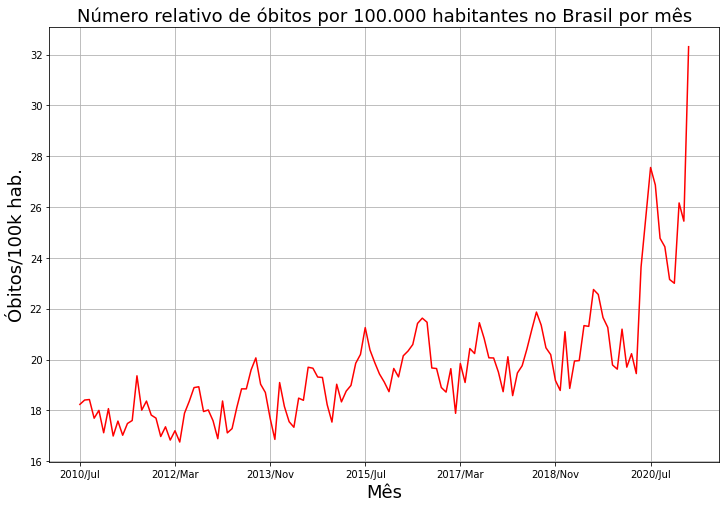

In [24]:
dados_obitos_uf_por_100k.loc["Total"].plot(figsize=(12,8))
plt.title("Número relativo de óbitos por 100.000 habitantes no Brasil por mês", fontsize=18)
plt.xlabel("Mês", fontsize=18)
plt.ylabel("Óbitos/100k hab.", fontsize=18)
plt.gca().get_lines()[0].set_color("red")
plt.grid()
plt.show()

Analisando esses dados podemos ver que, mesmo removendo a variável de população, ainda se mantém a sazonalidade e tendência de crescimento observado na pergunta 1 e 2

### 7.5 - Analisando quais estados tem maior número de óbitos/100k hab. nos dois picos da pandemia do coronavírus

Nessa análise, gostaria de verificar quais foram os estados que tiveram maior número de óbitos por 100.000 habitantes nos dois picos da pandemia do coronavírus:
- Jul/2020
- Mar/2021

#### 7.5.1 - Julho de 2020

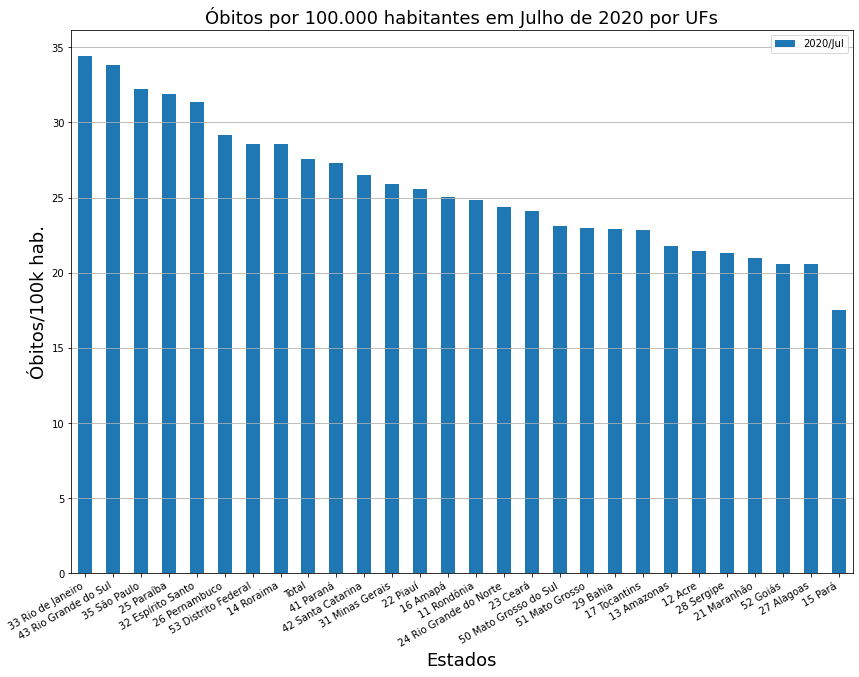

In [25]:
dados_obitos_uf_por_100k.sort_values(by="2020/Jul", axis=0, ascending=False).plot.bar(y="2020/Jul", figsize=(14,10))
plt.title("Óbitos por 100.000 habitantes em Julho de 2020 por UFs", fontsize=18)
plt.xlabel("Estados", fontsize=18)
plt.ylabel("Óbitos/100k hab.", fontsize=18)
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y")
plt.show()

#### 7.5.2 - Março de 2021

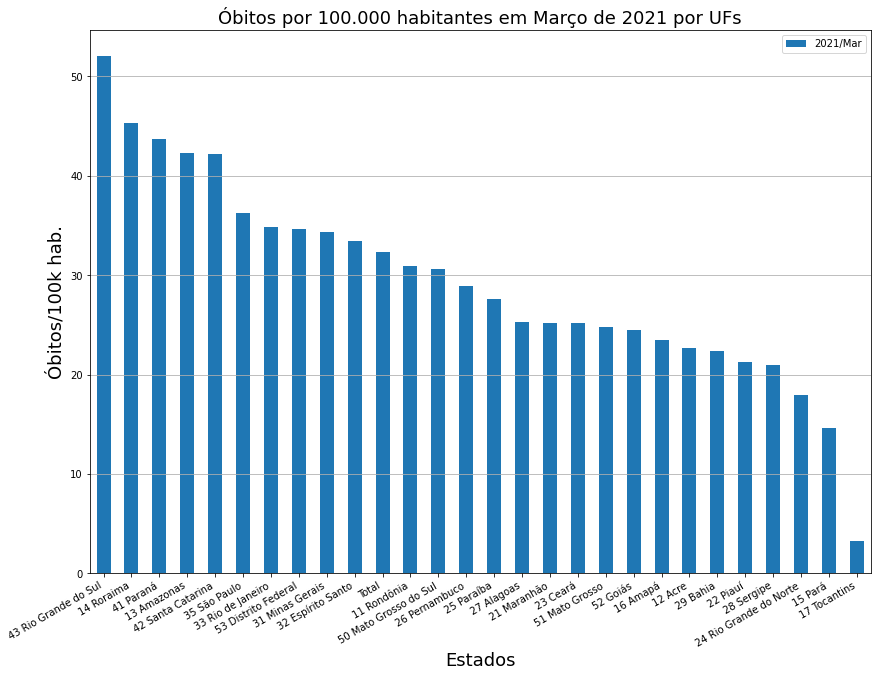

In [26]:
dados_obitos_uf_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False).plot.bar(y="2021/Mar", figsize=(14,10))
plt.title("Óbitos por 100.000 habitantes em Março de 2021 por UFs", fontsize=18)
plt.xlabel("Estados", fontsize=18)
plt.ylabel("Óbitos/100k hab.", fontsize=18)
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y")
plt.show()

O pico de março de 2021 foi muito pior. Mas quão pior foi? Será que todos os estados que foram muito impactados no pico de 2020 sofreram igual em 2021?Comparando os dois períodos

#### 7.5.3 - Comparando os dois períodos

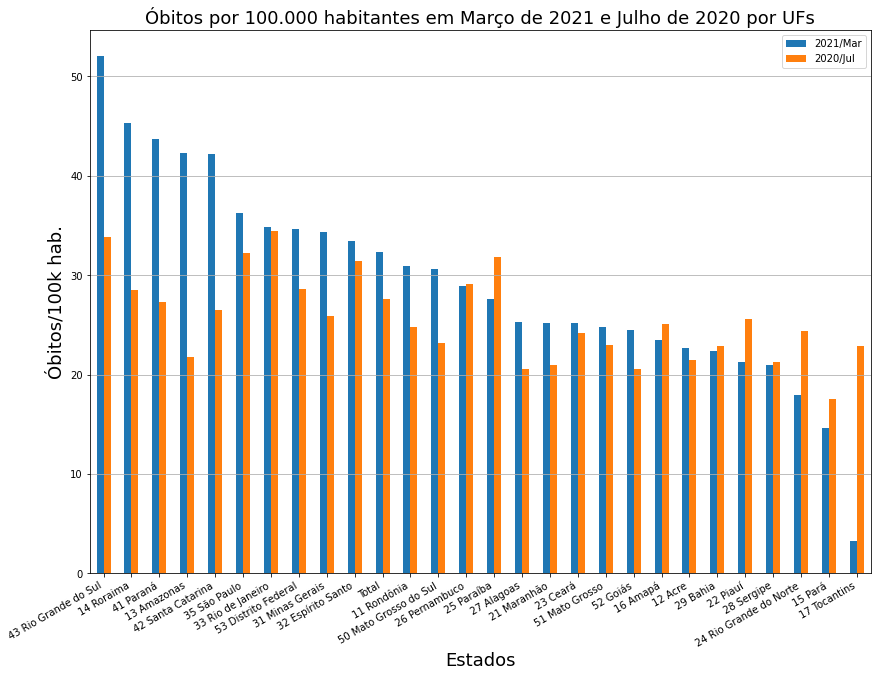

In [27]:
dados_obitos_uf_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False).plot.bar(y=["2021/Mar", "2020/Jul"], figsize=(14,10))
plt.title("Óbitos por 100.000 habitantes em Março de 2021 e Julho de 2020 por UFs", fontsize=18)
plt.xlabel("Estados", fontsize=18)
plt.ylabel("Óbitos/100k hab.", fontsize=18)
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y")
plt.show()

## 8 - Pergunta 04. Como se comportam os óbitos por região? Por valores absolutos e por valores relativos à população

### 8.1 - Criando planilha dados_obitos_rg_usaveis

#### 8.1.1 - Adicionando uma coluna na planilha dados_obitos_uf_usaveis com uma coluna das regioes

In [28]:
index_list = dados_obitos_uf_usaveis.index.to_list()

regiao = []
for estado in index_list:
  if estado[0] == "1":
    regiao.append("Norte")
  elif estado[0] == "2":
    regiao.append("Nordeste")
  elif estado[0] == "3":
    regiao.append("Sudeste")
  elif estado[0] == "4":
    regiao.append("Sul")
  elif estado[0] == "5":
    regiao.append("Centro-Oeste")

regiao.append("Brasil")

#### 8.1.2 - Adicionando a nova lista com a coluna Região

In [29]:
dados_obitos_uf_usaveis["Regiao"] = regiao

#### 8.1.3 - Adicionando uma linha de cada região com a somatória dos valores dos estados de cada região

In [30]:
dados_obitos_uf_usaveis.loc["Norte"] = dados_obitos_uf_usaveis[dados_obitos_uf_usaveis["Regiao"]=="Norte"].sum()
dados_obitos_uf_usaveis.loc["Nordeste"] = dados_obitos_uf_usaveis[dados_obitos_uf_usaveis["Regiao"]=="Nordeste"].sum()
dados_obitos_uf_usaveis.loc["Sudeste"] = dados_obitos_uf_usaveis[dados_obitos_uf_usaveis["Regiao"]=="Sudeste"].sum()
dados_obitos_uf_usaveis.loc["Sul"] = dados_obitos_uf_usaveis[dados_obitos_uf_usaveis["Regiao"]=="Sul"].sum()
dados_obitos_uf_usaveis.loc["Centro-Oeste"] = dados_obitos_uf_usaveis[dados_obitos_uf_usaveis["Regiao"]=="Centro-Oeste"].sum()

dados_obitos_uf_usaveis.tail()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total,Regiao
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Norte,1708,1736,1793,1717,1703,1579,1808,1735,1722,1786,1705,1729,1752,1663,1946,1699,1686,1654,1768,1749,1837,1887,1796,1820,1853,1583,1797,1807,1735,1718,1853,1883,1922,1989,1915,1963,1707,1928,1835,1784,...,2116,2269,2206,2369,2359,2300,2300,2211,2279,2183,2165,2451,2267,2415,2422,2479,2366,2322,2250,2545,2349,2336,2260,2393,2395,2345,2335,3903,5021,3834,3625,2941,2583,2382,2469,3386,3829,4381,319412,NorteNorteNorteNorteNorteNorteNorte
Nordeste,7180,7360,7087,7131,7322,6736,7563,7264,7678,7445,7479,7135,7781,7454,7819,7630,7546,7385,7880,7452,7623,7786,7749,7890,7903,8253,7778,7710,7905,7315,7819,7608,7842,8427,8923,8811,8823,8736,8417,8436,...,9193,9503,10001,10094,9698,10113,9994,9554,9859,9189,8909,10140,9000,9938,10184,10788,10504,10871,10850,10394,10213,10006,9898,10276,9560,10110,9603,12751,13589,14104,13293,11523,11393,11301,10738,11997,11996,14057,1378607,NordesteNordesteNordesteNordesteNordesteNordes...
Sudeste,17906,17716,17934,16950,17513,16925,17555,16318,16952,16183,16819,17035,19045,17442,17462,16958,17044,16469,16432,15831,16301,15603,17351,17752,18610,18618,17611,17613,16859,16317,17978,16170,16340,17093,18075,17822,18779,19251,18316,18156,...,18049,19187,19144,20141,21133,21620,20724,20007,19692,18713,18908,20958,18484,19615,19367,21136,21371,22980,22090,20970,20983,19098,19273,21296,19072,19807,19513,23383,24876,27676,25809,25019,24525,23135,23457,26453,24826,31629,2936941,SudesteSudesteSudesteSudeste
Sul,6497,6979,6779,6592,6523,6256,6063,5823,5796,5759,6213,6546,7181,6814,6623,6562,6442,5960,6106,5959,6123,5758,6493,6741,6845,6849,6316,6486,6320,6080,6629,6135,6085,6398,6387,6648,7332,7698,7279,6955,...,6822,6901,7069,7275,8195,8708,8822,8341,7793,7580,7081,7926,7179,7193,7265,7628,7700,8621,9050,8733,8480,7600,7385,7906,7856,7643,6965,7379,7650,8933,9873,9219,9463,8939,9142,10210,10169,14106,1120451,SulSulSul
Centro-Oeste,2246,2105,2368,2161,2119,1988,2376,2141,2308,2216,2104,2132,2301,2055,2308,2250,2169,2017,2078,2266,2123,2119,2036,2177,2261,2262,2154,2187,2167,2177,2306,2314,2283,2253,2345,2427,2550,2552,2272,2164,...,2432,2630,2691,2629,2701,2854,2710,2607,2560,2416,2229,2679,2581,2634,2622,2740,2799,3021,3197,2913,2741,2641,2547,2837,2697,2819,2681,2575,3038,3796,4321,3805,3872,3379,3043,3550,3286,4571,386514,Centro-OesteCentro-OesteCentro-OesteCentro-Oeste


#### 8.1.4 - Criando novo DF apenas com as linhas de cada região

In [31]:
rows_to_select = ["Norte", "Nordeste", "Sudeste", "Sul", "Centro-Oeste", "Total"]

dados_obitos_rg_usaveis = dados_obitos_uf_usaveis.loc[rows_to_select].drop("Regiao", axis=1)
dados_obitos_rg_usaveis.rename(index={"Total":"Brasil"}, inplace=True)
dados_obitos_rg_usaveis

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Norte,1708,1736,1793,1717,1703,1579,1808,1735,1722,1786,1705,1729,1752,1663,1946,1699,1686,1654,1768,1749,1837,1887,1796,1820,1853,1583,1797,1807,1735,1718,1853,1883,1922,1989,1915,1963,1707,1928,1835,1784,...,2177,2116,2269,2206,2369,2359,2300,2300,2211,2279,2183,2165,2451,2267,2415,2422,2479,2366,2322,2250,2545,2349,2336,2260,2393,2395,2345,2335,3903,5021,3834,3625,2941,2583,2382,2469,3386,3829,4381,319412
Nordeste,7180,7360,7087,7131,7322,6736,7563,7264,7678,7445,7479,7135,7781,7454,7819,7630,7546,7385,7880,7452,7623,7786,7749,7890,7903,8253,7778,7710,7905,7315,7819,7608,7842,8427,8923,8811,8823,8736,8417,8436,...,9550,9193,9503,10001,10094,9698,10113,9994,9554,9859,9189,8909,10140,9000,9938,10184,10788,10504,10871,10850,10394,10213,10006,9898,10276,9560,10110,9603,12751,13589,14104,13293,11523,11393,11301,10738,11997,11996,14057,1378607
Sudeste,17906,17716,17934,16950,17513,16925,17555,16318,16952,16183,16819,17035,19045,17442,17462,16958,17044,16469,16432,15831,16301,15603,17351,17752,18610,18618,17611,17613,16859,16317,17978,16170,16340,17093,18075,17822,18779,19251,18316,18156,...,19791,18049,19187,19144,20141,21133,21620,20724,20007,19692,18713,18908,20958,18484,19615,19367,21136,21371,22980,22090,20970,20983,19098,19273,21296,19072,19807,19513,23383,24876,27676,25809,25019,24525,23135,23457,26453,24826,31629,2936941
Sul,6497,6979,6779,6592,6523,6256,6063,5823,5796,5759,6213,6546,7181,6814,6623,6562,6442,5960,6106,5959,6123,5758,6493,6741,6845,6849,6316,6486,6320,6080,6629,6135,6085,6398,6387,6648,7332,7698,7279,6955,...,7544,6822,6901,7069,7275,8195,8708,8822,8341,7793,7580,7081,7926,7179,7193,7265,7628,7700,8621,9050,8733,8480,7600,7385,7906,7856,7643,6965,7379,7650,8933,9873,9219,9463,8939,9142,10210,10169,14106,1120451
Centro-Oeste,2246,2105,2368,2161,2119,1988,2376,2141,2308,2216,2104,2132,2301,2055,2308,2250,2169,2017,2078,2266,2123,2119,2036,2177,2261,2262,2154,2187,2167,2177,2306,2314,2283,2253,2345,2427,2550,2552,2272,2164,...,2702,2432,2630,2691,2629,2701,2854,2710,2607,2560,2416,2229,2679,2581,2634,2622,2740,2799,3021,3197,2913,2741,2641,2547,2837,2697,2819,2681,2575,3038,3796,4321,3805,3872,3379,3043,3550,3286,4571,386514
Brasil,35537,35896,35961,34551,35180,33484,35365,33281,34456,33389,34320,34577,38060,35428,36158,35099,34887,33485,34264,33257,34007,33153,35425,36380,37472,37565,35656,35803,34986,33607,36585,34110,34472,36160,37645,37671,39191,40165,38119,37495,...,41764,38612,40490,41111,42508,44086,45595,44550,42720,42183,40081,39292,44154,39511,41795,41860,44771,44740,47815,47437,45555,44766,41681,41363,44708,41580,42724,41097,49991,54174,58343,56921,52507,51836,49136,48849,55596,54106,68744,6141925


### 8.2 - Analisando valores absolutos de óbitos por região

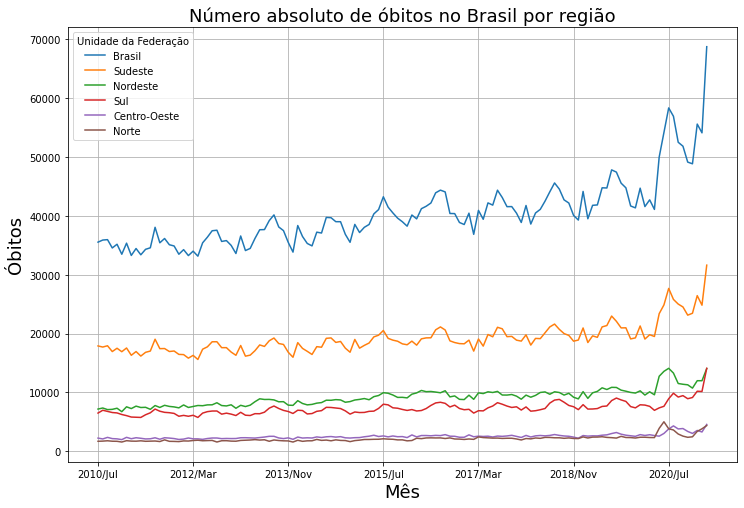

In [32]:
dados_obitos_rg_usaveis.sort_values(by="Total", axis=0, ascending=False).drop("Total", axis=1).T.plot(figsize=(12,8))
plt.title("Número absoluto de óbitos no Brasil por região", fontsize=18)
plt.xlabel("Mês", fontsize=18)
plt.ylabel("Óbitos", fontsize=18)
plt.grid()
plt.show()

### 8.3 - Criando planilha habitantes_rg

In [33]:
#criando novo Data Frame
habitantes_rg = pd.read_csv(url_habitantes, sep=";", encoding="ISO-8859-1", engine="python", skiprows=1, skipfooter=2, thousands=".", decimal=".")

#removendo valores específicos dos estados e deixando apenas valores das regiões e do brasil
regioes_e_total = habitantes_rg.columns.to_list()[:7]
habitantes_rg = habitantes_rg[regioes_e_total]

#transpondo a planilha
habitantes_rg = habitantes_rg.T
habitantes_rg.head()

#excluindo dados de 2021 que não estão presentes na planilha dados_obitos_rg_usaveis
habitantes_columns = habitantes_rg.columns.to_list()[:-9]
habitantes_rg = habitantes_rg[habitantes_columns]
habitantes_rg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128
DATA,"julho, 2010","agosto, 2010","setembro, 2010","outubro, 2010","novembro, 2010","dezembro, 2010","janeiro, 2011","fevereiro, 2011","marÃ§o, 2011","abril, 2011","maio, 2011","junho, 2011","julho, 2011","agosto, 2011","setembro, 2011","outubro, 2011","novembro, 2011","dezembro, 2011","janeiro, 2012","fevereiro, 2012","marÃ§o, 2012","abril, 2012","maio, 2012","junho, 2012","julho, 2012","agosto, 2012","setembro, 2012","outubro, 2012","novembro, 2012","dezembro, 2012","janeiro, 2013","fevereiro, 2013","marÃ§o, 2013","abril, 2013","maio, 2013","junho, 2013","julho, 2013","agosto, 2013","setembro, 2013","outubro, 2013",...,"dezembro, 2017","janeiro, 2018","fevereiro, 2018","marÃ§o, 2018","abril, 2018","maio, 2018","junho, 2018","julho, 2018","agosto, 2018","setembro, 2018","outubro, 2018","novembro, 2018","dezembro, 2018","janeiro, 2019","fevereiro, 2019","marÃ§o, 2019","abril, 2019","maio, 2019","junho, 2019","julho, 2019","agosto, 2019","setembro, 2019","outubro, 2019","novembro, 2019","dezembro, 2019","janeiro, 2020","fevereiro, 2020","marÃ§o, 2020","abril, 2020","maio, 2020","junho, 2020","julho, 2020","agosto, 2020","setembro, 2020","outubro, 2020","novembro, 2020","dezembro, 2020","janeiro, 2021","fevereiro, 2021","marÃ§o, 2021"
Brasil,194875052,195017573,195160170,195302839,195445578,195588384,195731254,195874186,196017176,196160222,196303321,196446470,196589667,196732907,196876190,197019511,197162868,197306259,197449680,197593128,197736601,197880096,198023610,198167140,198310684,198454239,198597801,198741368,198884937,199028505,199172070,199315629,199459179,199602716,199746239,199889744,200033229,200176690,200320126,200463532,...,207534630,207672820,207810834,207948670,208086325,208223796,208361079,208498173,208635074,208771780,208908287,209044594,209180697,209316592,209452279,209587753,209723012,209858053,209992873,210127469,210261839,210395980,210529889,210663562,210796998,210930193,211063145,211195851,211328308,211460513,211592463,211724156,211855588,211986757,212117661,212248295,212378658,212508746,212638558,212768089
Norte,16247841,16267657,16287491,16307345,16327217,16347107,16367016,16386941,16406884,16426844,16446820,16466812,16486819,16506842,16526880,16546933,16566999,16587080,16607174,16627281,16647401,16667534,16687678,16707834,16728002,16748180,16768370,16788569,16808778,16828997,16849225,16869462,16889707,16909961,16930222,16950490,16970766,16991048,17011337,17031631,...,18045950,18066069,18086175,18106268,18126347,18146413,18166464,18186501,18206522,18226529,18246519,18266494,18286452,18306393,18326317,18346224,18366113,18385984,18405836,18425669,18445483,18465277,18485051,18504805,18524538,18544249,18563940,18583608,18603255,18622878,18642479,18662057,18681611,18701141,18720647,18740128,18759583,18779014,18798418,18817797
Nordeste,54229734,54255905,54282102,54308325,54334573,54360845,54387140,54413459,54439800,54466163,54492547,54518952,54545376,54571819,54598280,54624760,54651256,54677769,54704297,54730841,54757399,54783970,54810555,54837152,54863761,54890381,54917012,54943652,54970302,54996959,55023625,55050298,55076977,55103662,55130352,55157047,55183745,55210447,55237151,55263857,...,56586819,56612739,56638625,56664479,56690299,56716084,56741833,56767547,56793224,56818864,56844465,56870029,56895553,56921036,56946480,56971882,56997242,57022559,57047834,57073064,57098250,57123390,57148485,57173533,57198533,57223486,57248390,57273245,57298051,57322805,57347509,57372160,57396759,57421305,57445796,57470234,57494616,57518942,57543212,57567424
Sudeste,82138970,82198254,82257547,82316846,82376151,82435461,82494774,82554090,82613407,82672725,82732041,82791356,82850667,82909975,82969277,83028573,83087862,83147142,83206412,83265672,83324920,83384155,834

In [34]:
#removendo a linha DATA
habitantes_rg.drop("DATA", axis=0, inplace=True)

#mudando o label das colunas
habitantes_rg_columns_new = dados_obitos_rg_usaveis.columns.to_list()[:-1]
habitantes_rg.columns = habitantes_rg_columns_new

#criando a coluna "Total"
habitantes_rg["Total"] = habitantes_rg.sum(axis=1)
habitantes_rg

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Brasil,194875052,195017573,195160170,195302839,195445578,195588384,195731254,195874186,196017176,196160222,196303321,196446470,196589667,196732907,196876190,197019511,197162868,197306259,197449680,197593128,197736601,197880096,198023610,198167140,198310684,198454239,198597801,198741368,198884937,199028505,199172070,199315629,199459179,199602716,199746239,199889744,200033229,200176690,200320126,200463532,...,207672820,207810834,207948670,208086325,208223796,208361079,208498173,208635074,208771780,208908287,209044594,209180697,209316592,209452279,209587753,209723012,209858053,209992873,210127469,210261839,210395980,210529889,210663562,210796998,210930193,211063145,211195851,211328308,211460513,211592463,211724156,211855588,211986757,212117661,212248295,212378658,212508746,212638558,212768089,26310856592.00
Norte,16247841,16267657,16287491,16307345,16327217,16347107,16367016,16386941,16406884,16426844,16446820,16466812,16486819,16506842,16526880,16546933,16566999,16587080,16607174,16627281,16647401,16667534,16687678,16707834,16728002,16748180,16768370,16788569,16808778,16828997,16849225,16869462,16889707,16909961,16930222,16950490,16970766,16991048,17011337,17031631,...,18066069,18086175,18106268,18126347,18146413,18166464,18186501,18206522,18226529,18246519,18266494,18286452,18306393,18326317,18346224,18366113,18385984,18405836,18425669,18445483,18465277,18485051,18504805,18524538,18544249,18563940,18583608,18603255,18622878,18642479,18662057,18681611,18701141,18720647,18740128,18759583,18779014,18798418,18817797,2262334929.00
Nordeste,54229734,54255905,54282102,54308325,54334573,54360845,54387140,54413459,54439800,54466163,54492547,54518952,54545376,54571819,54598280,54624760,54651256,54677769,54704297,54730841,54757399,54783970,54810555,54837152,54863761,54890381,54917012,54943652,54970302,54996959,55023625,55050298,55076977,55103662,55130352,55157047,55183745,55210447,55237151,55263857,...,56612739,56638625,56664479,56690299,56716084,56741833,56767547,56793224,56818864,56844465,56870029,56895553,56921036,56946480,56971882,56997242,57022559,57047834,57073064,57098250,57123390,57148485,57173533,57198533,57223486,57248390,57273245,57298051,57322805,57347509,57372160,57396759,57421305,57445796,57470234,57494616,57518942,57543212,57567424,7213611135.00
Sudeste,82138970,82198254,82257547,82316846,82376151,82435461,82494774,82554090,82613407,82672725,82732041,82791356,82850667,82909975,82969277,83028573,83087862,83147142,83206412,83265672,83324920,83384155,83443376,83502582,83561772,83620944,83680098,83739233,83798346,83857439,83916508,83975554,84034574,84093569,84152536,84211475,84270385,84329264,84388112,84446927,...,87377452,87433055,87488567,87543988,87599315,87654548,87709686,87764728,87819672,87874518,87929264,87983909,88038452,88092893,88147229,88201460,88255585,88309603,88363512,88417312,88471001,88524579,88578043,88631394,88684629,88737749,88790751,88843635,88896400,88949044,89001566,89053966,89106242,89158393,89210418,89262316,89314086,89365727,89417237,11076072857.00
Sul,27911930,27930974,27950035,27969111,27988203,28007310,28026430,28045565,28064714,28083875,28103049,28122236,28141434,28160643,28179863,28199094,28218334,28237584,28256843,28276111,28295387,28314670,28333961,28353259,28372563,28391873,28411188,2843

### 8.4 - Criando planilha dados_obitos_rg_por_100k

In [35]:
dados_obitos_rg_por_100k = (dados_obitos_rg_usaveis / (habitantes_rg / 100000))
dados_obitos_rg_por_100k.head()

,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Brasil,18.24,18.41,18.43,17.69,18.00,17.12,18.07,16.99,17.58,17.02,17.48,17.60,19.36,18.01,18.37,17.81,17.69,16.97,17.35,16.83,17.20,16.75,17.89,18.36,18.90,18.93,17.95,18.01,17.59,16.89,18.37,17.11,17.28,18.12,18.85,18.85,19.59,20.06,19.03,18.70,...,20.11,18.58,19.47,19.76,20.41,21.16,21.87,21.35,20.46,20.19,19.17,18.78,21.09,18.86,19.94,19.96,21.33,21.31,22.76,22.56,21.65,21.26,19.79,19.62,21.20,19.70,20.23,19.45,23.64,25.60,27.56,26.87,24.77,24.44,23.15,23.00,26.16,25.45,32.31,23.34
Centro-Oeste,15.66,14.65,16.46,15.01,14.70,13.77,16.44,14.79,15.93,15.27,14.48,14.66,15.80,14.09,15.81,15.39,14.82,13.76,14.16,15.42,14.43,14.39,13.81,14.74,15.29,15.28,14.53,14.74,14.59,14.63,15.48,15.52,15.29,15.07,15.67,16.20,17.00,16.99,15.11,14.37,...,16.91,15.20,16.42,16.79,16.38,16.81,17.74,16.83,16.17,15.86,14.96,13.78,16.55,15.93,16.23,16.14,16.85,17.20,18.54,19.60,17.84,16.77,16.14,15.55,17.30,16.43,17.16,16.30,15.64,18.43,23.00,26.16,23.01,23.39,20.39,18.35,21.38,19.77,27.47,19.32
Nordeste,13.24,13.57,13.06,13.13,13.48,12.39,13.91,13.35,14.10,13.67,13.72,13.09,14.27,13.66,14.32,13.97,13.81,13.51,14.40,13.62,13.92,14.21,14.14,14.39,14.40,15.04,14.16,14.03,14.38,13.30,14.21,13.82,14.24,15.29,16.19,15.97,15.99,15.82,15.24,15.26,...,16.87,16.23,16.77,17.64,17.80,17.09,17.81,17.60,16.81,17.34,16.16,15.66,17.81,15.80,17.44,17.87,18.92,18.41,19.05,19.00,18.20,17.87,17.50,17.30,17.96,16.70,17.65,16.76,22.24,23.70,24.58,23.16,20.07,19.83,19.66,18.68,20.86,20.85,24.42,19.11
Norte,10.51,10.67,11.01,10.53,10.43,9.66,11.05,10.59,10.50,10.87,10.37,10.50,10.63,10.07,11.77,10.27,10.18,9.97,10.65,10.52,11.03,11.32,10.76,10.89,11.08,9.45,10.72,10.76,10.32,10.21,11.00,11.16,11.38,11.76,11.31,11.58,10.06,11.35,10.79,10.47,...,12.05,11.70,12.53,12.17,13.05,12.99,12.65,12.63,12.13,12.49,11.95,11.84,13.39,12.37,13.16,13.19,13.48,12.85,12.60,12.20,13.78,12.71,12.62,12.20,12.90,12.90,12.62,12.55,20.96,26.93,20.54,19.40,15.73,13.80,12.71,13.16,18.03,20.37,23.28,14.12
Sudeste,21.80,21.55,21.80,20.59,21.26,20.53,21.28,19.77,20.52,19.57,20.33,20.58,22.99,21.04,21.05,20.42,20.51,19.81,19.75,19.01,19.56,18.71,20.79,21.26,22.27,22.26,21.05,21.03,20.12,19.46,21.42,19.26,19.44,20.33,21.48,21.16,22.28,22.83,21.70,21.50,...,22.65,20.64,21.93,21.87,22.99,24.11,24.65,23.61,22.78,22.41,21.28,21.49,23.81,20.98,22.25,21.96,23.95,24.20,26.01,24.98,23.70,23.70,21.56,21.75,24.01,21.49,22.31,21.96,26.30,27.97,31.10,28.98,28.08,27.51,25.93,26.28,29.62,27.78,35.37,26.52


### 8.5 - Analisando valores de óbitos a cada 100.000 habitantes por região

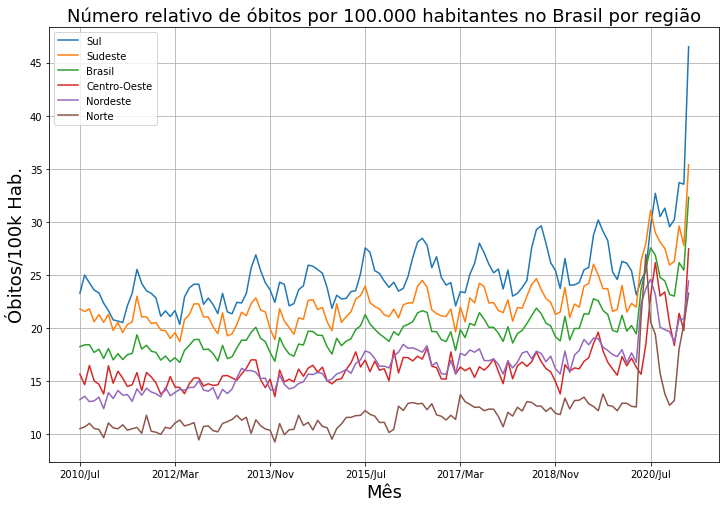

In [36]:
dados_obitos_rg_por_100k.sort_values(by="Total", axis=0, ascending=False).drop("Total", axis=1).T.plot(figsize=(12,8))
plt.title("Número relativo de óbitos por 100.000 habitantes no Brasil por região", fontsize=18)
plt.xlabel("Mês", fontsize=18)
plt.ylabel("Óbitos/100k Hab.", fontsize=18)
plt.grid()
plt.show()

### 8.6 - Analisando quais regiões tem maior número de óbitos/100k hab. nos dois picos da pandemia do coronavírus

Nessa análise, gostaria de verificar quais foram as regiões que tiveram maior número de óbitos por 100.000 habitantes nos dois picos da pandemia do coronavírus:
- Jul/2020
- Mar/2021

#### 8.6.1 - Julho de 2020

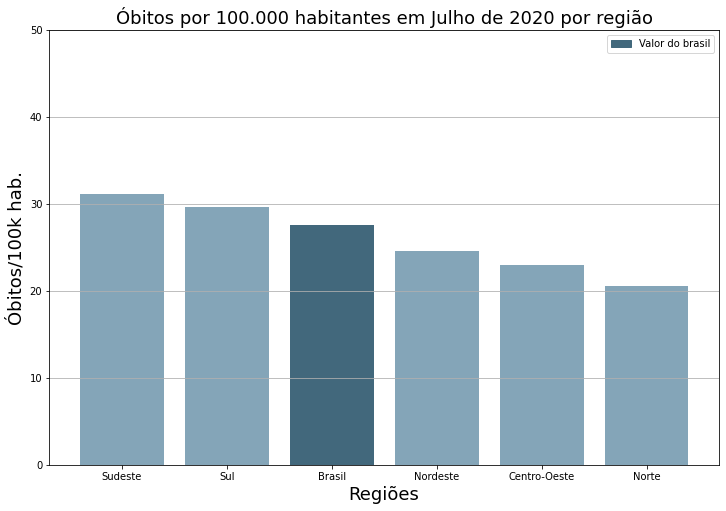

In [37]:
#criando eixo X
x_jul = dados_obitos_rg_por_100k.sort_values(by="2020/Jul", axis=0, ascending=False).index
#criando eixo y
y_jul = dados_obitos_rg_por_100k.sort_values(by="2020/Jul", axis=0, ascending=False)["2020/Jul"]

#setando tamanho da figura
plt.figure(figsize=(12,8))
#criando plot de barra
plt.bar(x_jul, y_jul, color=["#84a5b8", "#84a5b8", "#42687c", "#84a5b8", "#84a5b8", "#84a5b8"])
#criando título do gráfico
plt.title("Óbitos por 100.000 habitantes em Julho de 2020 por região", fontsize=18)
#criando título do eixo x
plt.xlabel("Regiões", fontsize=18)
#padronizando os ticks do eixo Y
plt.ylim(0,50)
plt.yticks(np.arange(0,51,10))
#criando título do eixo y
plt.ylabel("Óbitos/100k hab.", fontsize=18)
#criando legenda para destaque
red_patch = mpatches.Patch(color="#42687c", label="Valor do brasil")
plt.legend(handles=[red_patch])
#removendo informações desnecessárias e adicionando grid
plt.grid(axis="y")
plt.show()

#### 8.6.2 - Março de 2021

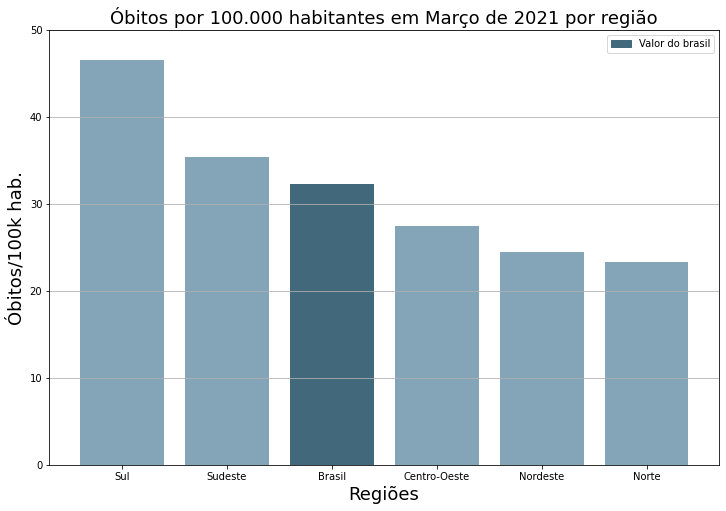

In [38]:
#criando eixo X
x_mar = dados_obitos_rg_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False).index
#criando eixo y
y_mar = dados_obitos_rg_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False)["2021/Mar"]

#setando tamanho da figura
plt.figure(figsize=(12,8))
#criando plot de barra
plt.bar(x_mar, y_mar, color=["#84a5b8", "#84a5b8", "#42687c", "#84a5b8", "#84a5b8", "#84a5b8"])
#criando título do gráfico
plt.title("Óbitos por 100.000 habitantes em Março de 2021 por região", fontsize=18)
#criando título do eixo x
plt.xlabel("Regiões", fontsize=18)
#padronizando os ticks do eixo Y
plt.ylim(0,50)
plt.yticks(np.arange(0,51,10))
#criando título do eixo y
plt.ylabel("Óbitos/100k hab.", fontsize=18)
#criando legenda para destaque
red_patch = mpatches.Patch(color="#42687c", label="Valor do brasil")
plt.legend(handles=[red_patch])
#removendo informações desnecessárias e adicionando grid
plt.grid(axis="y")
plt.show()

O pico de março de 2021 foi muito pior. Mas quão pior foi? Será que todos os estados que foram muito impactados no pico de 2020 sofreram igual em 2021?Comparando os dois períodos

#### 8.6.3 - Comparando os dois períodos

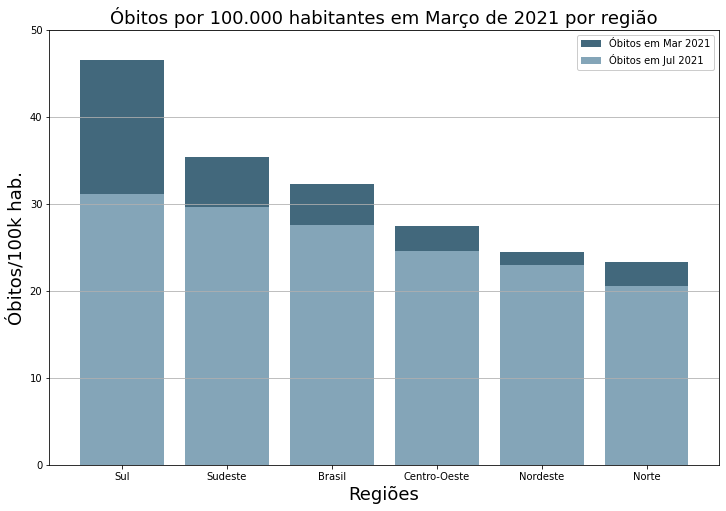

In [39]:
#criando eixo X
x_comparacao = dados_obitos_rg_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False).index
#criando eixo y(dados de 2021 Mar)
y_mar2 = dados_obitos_rg_por_100k.sort_values(by="2021/Mar", axis=0, ascending=False)["2021/Mar"]
#criando eixo z(dados de 2020 Jul)
z_jul = dados_obitos_rg_por_100k.sort_values(by="2020/Jul", axis=0, ascending=False)["2020/Jul"]

#setando tamanho da figura
plt.figure(figsize=(12,8))
#criando plot de barra
plt.bar(x_comparacao, y_mar2, color=["#42687c", "#42687c", "#42687c", "#42687c", "#42687c", "#42687c"], label="Óbitos em Mar 2021")
plt.bar(x_comparacao, z_jul, color=["#84a5b8", "#84a5b8", "#84a5b8", "#84a5b8", "#84a5b8", "#84a5b8"], label="Óbitos em Jul 2021")
#criando título do gráfico
plt.title("Óbitos por 100.000 habitantes em Março de 2021 por região", fontsize=18)
#criando título do eixo x
plt.xlabel("Regiões", fontsize=18)
#padronizando os ticks do eixo Y
plt.ylim(0,50)
plt.yticks(np.arange(0,51,10))
#criando título do eixo y
plt.ylabel("Óbitos/100k hab.", fontsize=18)
#criando legenda para destaque
plt.legend(framealpha=1, frameon=True)
#removendo informações desnecessárias e adicionando grid
plt.grid(axis="y")
plt.show()

### 8.7 - Comparando região Norte com região Sudeste
Um fato curioso é que, apesar do estado do Amazonas ser o 4º estado com o maior número de óbitos/100.000 habitantes no pico de 2021/Mar, a região do Norte foi a região com o menor número de óbitos por 100.000 habitantes nesse mesmo pico.

Para analisarmos melhor vamos plotar os óbitos/100k habitantes no pico de Mar 2021 para apenas os estados da região Norte e compra com os estados da região Sudeste

In [40]:
#adicionando a coluna de regiões
dados_obitos_uf_por_100k["Regiao"] = regiao

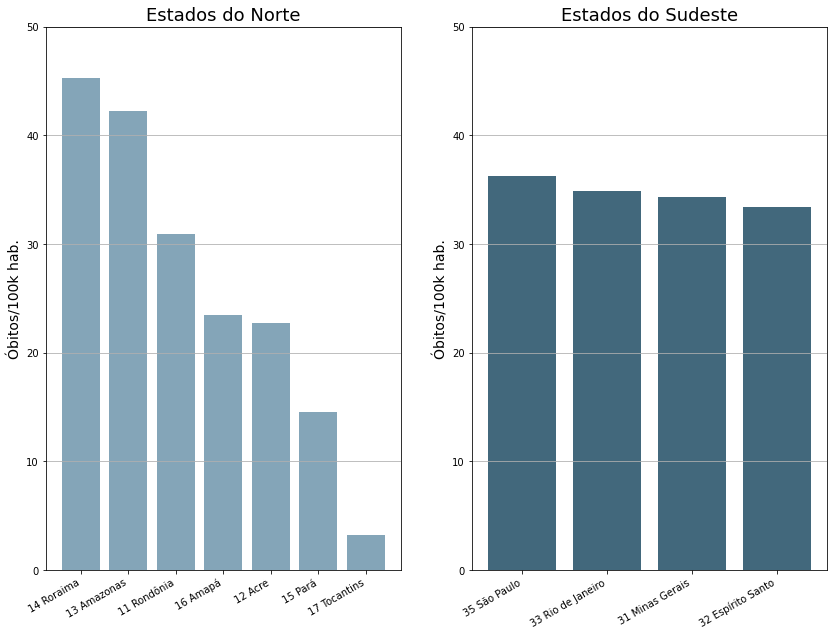

In [41]:
#criando eixos x e y do gráfico do Norte
x_norte = dados_obitos_uf_por_100k[dados_obitos_uf_por_100k["Regiao"]=="Norte"].sort_values(by="2021/Mar", axis=0, ascending=False).index
y_norte = dados_obitos_uf_por_100k[dados_obitos_uf_por_100k["Regiao"]=="Norte"].sort_values(by="2021/Mar", axis=0, ascending=False)["2021/Mar"]
#criando eixos x e y do gráfico do Sudeste
x_sudeste = dados_obitos_uf_por_100k[dados_obitos_uf_por_100k["Regiao"]=="Sudeste"].sort_values(by="2021/Mar", axis=0, ascending=False).index
y_sudeste = dados_obitos_uf_por_100k[dados_obitos_uf_por_100k["Regiao"]=="Sudeste"].sort_values(by="2021/Mar", axis=0, ascending=False)["2021/Mar"]

plt.figure(figsize=(14,10))

#plotando gráfico da esquerda - região Norte
plt.subplot(1, 2, 1)
plt.bar(x_norte, y_norte, color="#84a5b8")
plt.title("Estados do Norte", fontsize=18)
plt.ylabel("Óbitos/100k hab.", fontsize=14)
plt.ylim(0,50)
plt.yticks(np.arange(0,51,10))
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y")

#plotando gráfico da direita - região Sudeste
plt.subplot(1, 2, 2)
plt.bar(x_sudeste, y_sudeste, color="#42687c")
plt.title("Estados do Sudeste", fontsize=18)
plt.ylabel("Óbitos/100k hab.", fontsize=14)
plt.ylim(0,50)
plt.yticks(np.arange(0,51,10))
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y")

plt.show()

Ou seja, os estados da região Norte tem um comportamento diferente quando comparados entre si. Enquanto Roraima e Amazonas apresentaram um valor de óbitos/100k hab alto, os estados do Pará e Tocantins não.

Por outro lado, os estados da região Sudeste apresentam o comportamento similar, com um valor alto de óbitos/100k hab